In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
samples_amount_train = len(train_set)
samples_amount_test = len(test_set)
print(samples_amount_train, samples_amount_test)

159571 63978


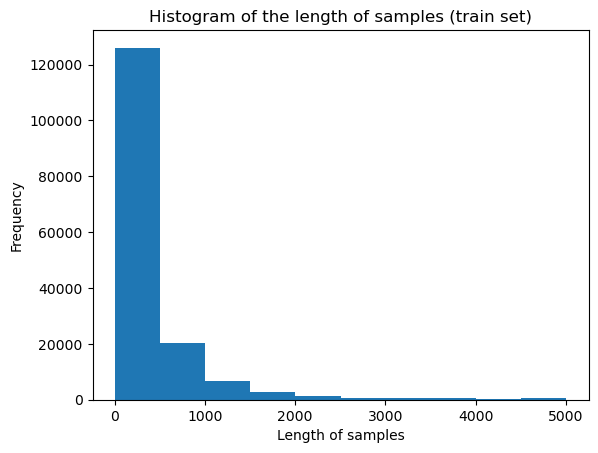

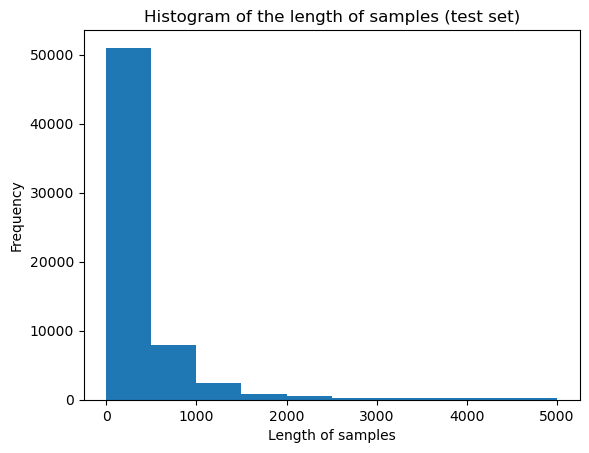

In [5]:
train_set['comment_length'] = train_set['comment_text'].apply(len)
plt.hist(train_set['comment_length'])
plt.title('Histogram of the length of samples (train set)')
plt.xlabel('Length of samples')
plt.ylabel('Frequency')
plt.show()

test_set['comment_length'] = test_set['comment_text'].apply(len)
plt.hist(test_set['comment_length'])
plt.title('Histogram of the length of samples (test set)')
plt.xlabel('Length of samples')
plt.ylabel('Frequency')
plt.show()

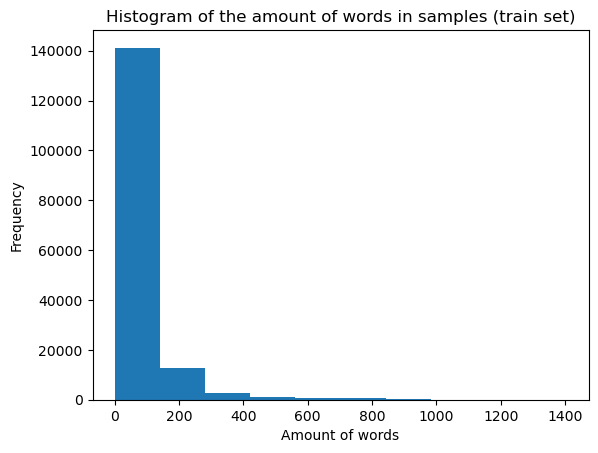

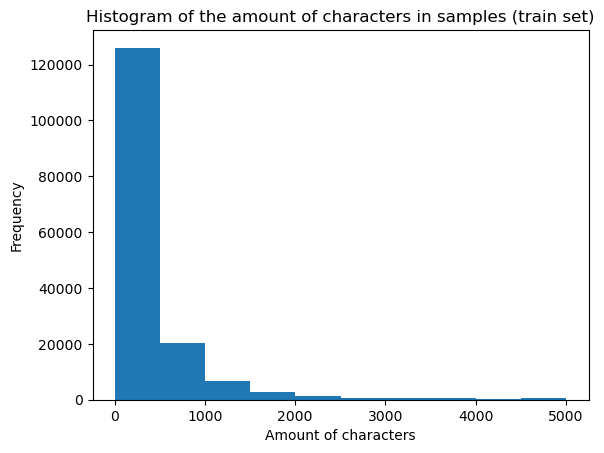

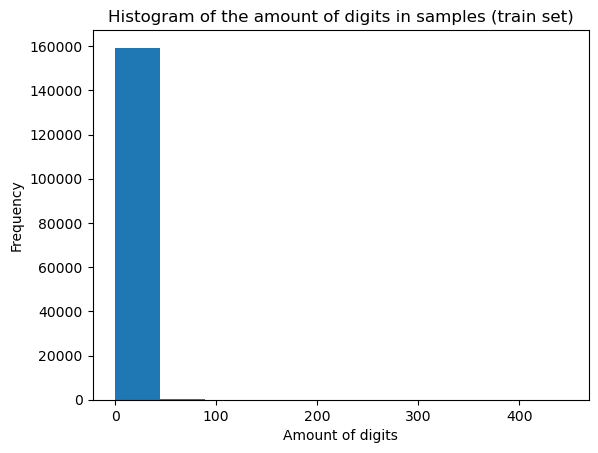

In [4]:
def count_words(comment):
    return len(re.findall(r'\w+', comment))

def count_chars(comment):
    return len(comment)

def count_digits(comment):
    return len(re.findall(r'\d+', comment))

train_set['words_amount'] = train_set['comment_text'].apply(count_words)
train_set['chars_amount'] = train_set['comment_text'].apply(count_chars)
train_set['digits_amount'] = train_set['comment_text'].apply(count_digits)

#histogram for amount of words per comment in the train set
plt.hist(train_set['words_amount'])
plt.title('Histogram of the amount of words in samples (train set)')
plt.xlabel('Amount of words')
plt.ylabel('Frequency')
plt.show()

#histogram for amount of characters per comment in the train set
plt.hist(train_set['chars_amount'])
plt.title('Histogram of the amount of characters in samples (train set)')
plt.xlabel('Amount of characters')
plt.ylabel('Frequency')
plt.show()

#histogram for amount of digits per comment in the train set
plt.hist(train_set['digits_amount'])
plt.title('Histogram of the amount of digits in samples (train set)')
plt.xlabel('Amount of digits')
plt.ylabel('Frequency')
plt.show()



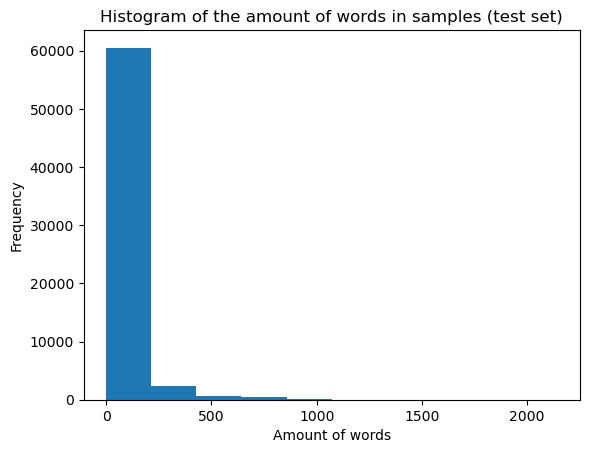

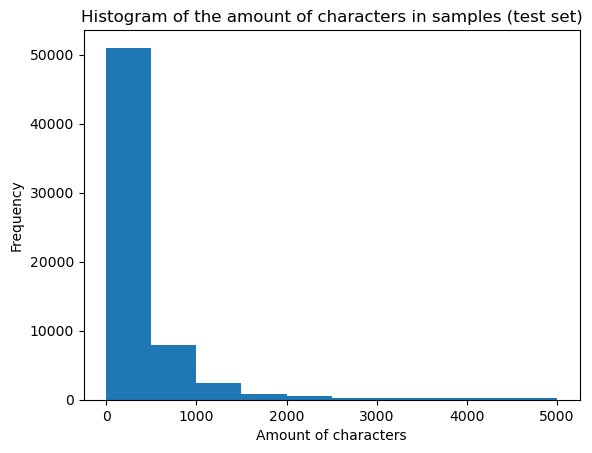

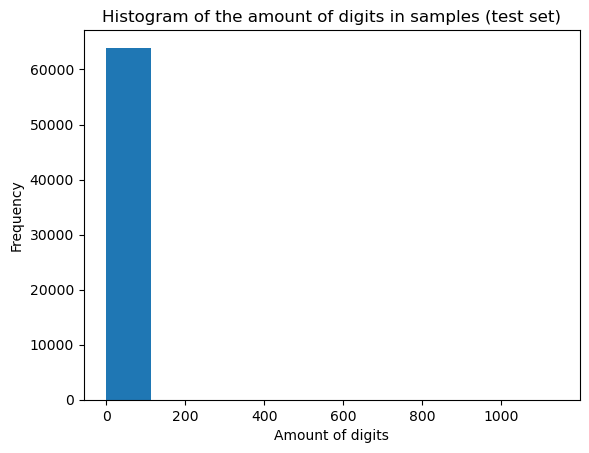

In [8]:
#now all the same for the test set

test_set['words_amount'] = test_set['comment_text'].apply(count_words)
test_set['chars_amount'] = test_set['comment_text'].apply(count_chars)
test_set['digits_amount'] = test_set['comment_text'].apply(count_digits)

#histogram for amount of words per comment in the test set
plt.hist(test_set['words_amount'])
plt.title('Histogram of the amount of words in samples (test set)')
plt.xlabel('Amount of words')
plt.ylabel('Frequency')
plt.show()

#histogram for amount of characters per comment in the test set
plt.hist(test_set['chars_amount'])
plt.title('Histogram of the amount of characters in samples (test set)')
plt.xlabel('Amount of characters')
plt.ylabel('Frequency')
plt.show()

#histogram for amount of digits per comment in the test set
plt.hist(test_set['digits_amount'])
plt.title('Histogram of the amount of digits in samples (test set)')
plt.xlabel('Amount of digits')
plt.ylabel('Frequency')
plt.show()

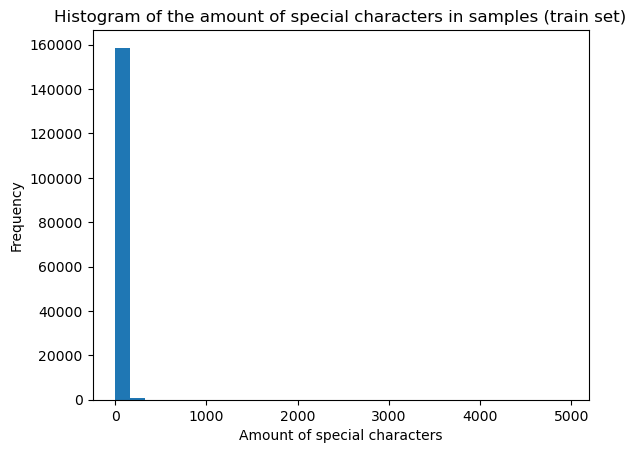

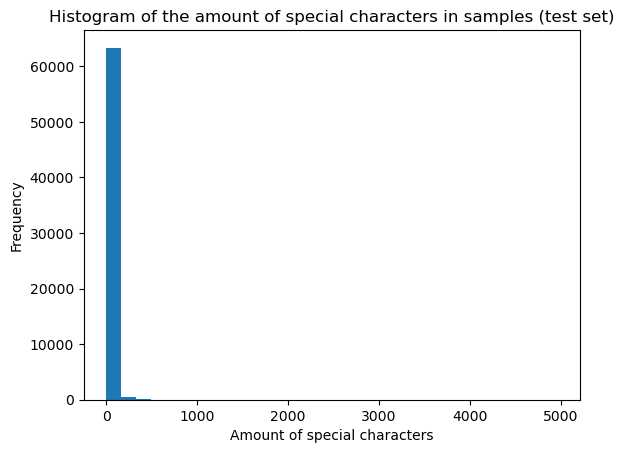

In [10]:
#calculating and displaying stats for special characters before removing them
def count_symbols(comment):
    return len(re.findall(r'[^\w\s]', comment))

train_set['symbols_amount'] = train_set['comment_text'].apply(count_symbols)
test_set['symbols_amount'] = test_set['comment_text'].apply(count_symbols)

#histogram for amount of special characters per comment in the train set
plt.hist(train_set['symbols_amount'], bins = 30)
plt.title('Histogram of the amount of special characters in samples (train set)')
plt.xlabel('Amount of special characters')
plt.ylabel('Frequency')
plt.show()

#histogram for amount of special characters per comment in the test set
plt.hist(test_set['symbols_amount'], bins = 30)
plt.title('Histogram of the amount of special characters in samples (test set)')
plt.xlabel('Amount of special characters')
plt.ylabel('Frequency')
plt.show()

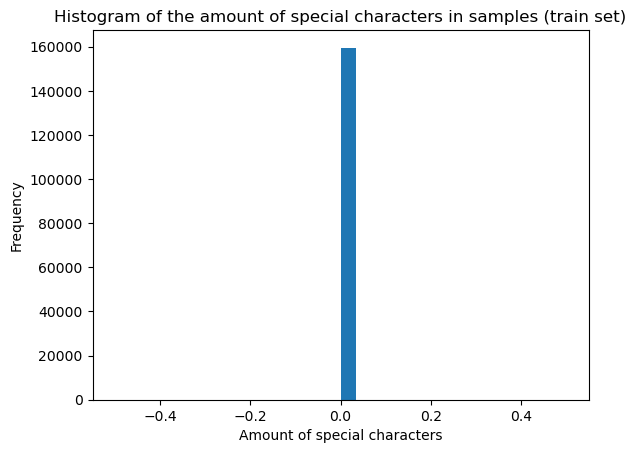

In [11]:
def remove_symbols(comment):
    return re.sub(r'[^\w\s]','',comment)

train_set['clean_text'] = train_set['comment_text'].apply(remove_symbols)
train_set['symbols_amount_new'] = train_set['clean_text'].apply(count_symbols)


#histogram for amount of special characters per comment in the train set
plt.hist(train_set['symbols_amount_new'], bins = 30)
plt.title('Histogram of the amount of special characters in samples (train set)')
plt.xlabel('Amount of special characters')
plt.ylabel('Frequency')
plt.show()

In [43]:
train_set.to_csv('cleaned_train.csv', index=False)


In [12]:
clean_train = pd.read_csv('cleaned_train.csv', nrows=10000)
vectorizer = CountVectorizer()

comment_vectors = vectorizer.fit_transform(clean_train['clean_text'])
comment_vectors_array = comment_vectors.toarray()
feature_names = vectorizer.get_feature_names_out()
comment_vectors_frame = pd.DataFrame(comment_vectors_array, columns = feature_names)

print(comment_vectors_frame)

      00  000  0000  00000000  0000dem  0000demh2  0001  0002  0005  001  ...  \
0      0    0     0         0        0          0     0     0     0    0  ...   
1      0    0     0         0        0          0     0     0     0    0  ...   
2      0    0     0         0        0          0     0     0     0    0  ...   
3      0    0     0         0        0          0     0     0     0    0  ...   
4      0    0     0         0        0          0     0     0     0    0  ...   
...   ..  ...   ...       ...      ...        ...   ...   ...   ...  ...  ...   
9995   0    0     0         0        0          0     0     0     0    0  ...   
9996   0    0     0         0        0          0     0     0     0    0  ...   
9997   0    0     0         0        0          0     0     0     0    0  ...   
9998   0    0     0         0        0          0     0     0     0    0  ...   
9999   0    0     0         0        0          0     0     0     0    0  ...   

      話して下さい  豆田  連絡  雲水  電

In [14]:
pca=PCA(.90)  
pca.fit(comment_vectors_array)  
print('Number of components to explain 90% Variance is',pca.n_components_)

Number of components to explain 90% Variance is 74


In [15]:
pca=PCA(.80)  
pca.fit(comment_vectors_array)  
print('Number of components to explain 80% Variance is',pca.n_components_)

Number of components to explain 80% Variance is 14


In [16]:
pca=PCA(.95)  
pca.fit(comment_vectors_array)  
print('Number of components to explain 95% Variance is',pca.n_components_)

Number of components to explain 95% Variance is 347
